#Install Tesseract 

In [1]:
!pip install pytesseract
!sudo apt install tesseract-ocr

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=4c2a04053fac6dd1173b4def5586f874fcd59b9a6dd7d22bab97471b23ce8f57
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http:/

#Import Packages

In [2]:
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt
import cv2
import re
from scipy.ndimage import rotate


Extract Text and Coordinates using Tesseract

In [3]:
def extract_data_from_image_file(file_n):
    return pytesseract.image_to_data(file_n, output_type='dict')

#Main Function including following features:

##1. Preprocessing (Grayscale,Rotation)
##2. Regex to extract DOB and Pan Card Number
##3. Draw bounding box around the extracted data in image. 
##4. Plot the output image.

In [8]:
def main(filename,rot):
    img=cv2.imread(filename)
    if rot:
        #Enter your rotation angle below
        img = rotate(img, 270)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #extract_text_from_image_file(gray, "eng")
    data = extract_data_from_image_file(gray)
    r = re.compile("([A-Z]{5}[0-9]{4}[A-Z]{1})|([0-9]{2}/[0-9]{2}/[0-9]{4})")
    val=[(x,ind) for ind,x in enumerate(data['text']) if r.match(x)]
    plt.figure(figsize=(12,8))
    for i in range(len(val)):
        ind=val[i][1]
        left=data['left'][ind]-10
        top=data['top'][ind]-10
        wid=data['width'][ind] +20
        height=data['height'][ind] +20
        cv2.rectangle(img, (left, top), (left+wid , top+height), (0, 0, 255), 4)
    print('Pan card number is {}.\nDate of Birth is {}.'.format(val[0][0],val[1][0]))
    print('\n')
    if rot:
        #Enter your rotation angle below
        img = rotate(img, 90)
    plt.imshow(img[:, :, ::-1])
    plt.show()

#Function calls for each pancard image. 
## Note: The boolean variable is used for specifying if rotation is required or not.

Pan card number is ELWPM8089J.
Date of Birth is 30/01/1997.




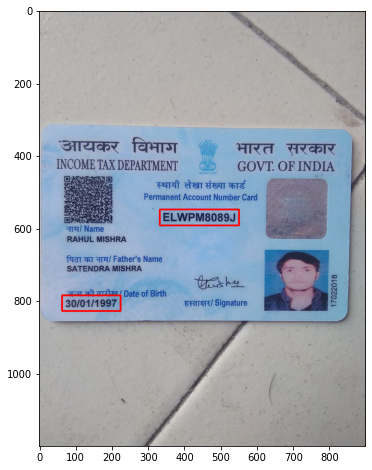

In [9]:
main('pan1.jpg',False)

Pan card number is BXAPC1000L.
Date of Birth is 13/09/1996.




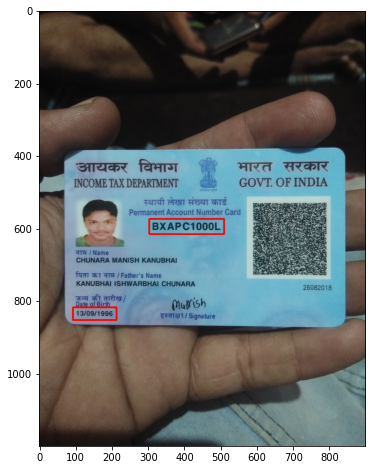

In [10]:
main('pan2.jpg',False)

Pan card number is BGYPJ0129A.
Date of Birth is 18/03/1996.




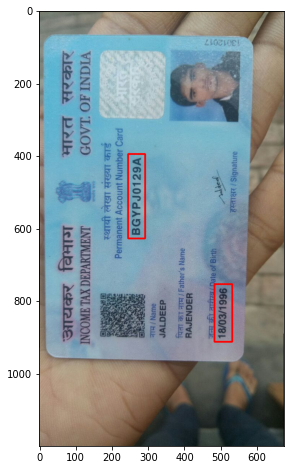

In [11]:
main('pan3.jpg',True)